## Details of used techniques or models for this project using 4/10 Lectures (as asked in rubric)


1.   Week 4: Python Third Party Library (**Pandas**, **Numpy**, **Sklearn**)
2. Week 5:  EDA (**Missing DATA**, **Categorical Data**, Distribution analysis using **Visualization**, **Descriptive Statistic**)
3. Week 6: Introduction to ML (**Classification** Analysis, **Feature selection**, Model selection)
4. Week 7: End to end Machine Learning **label encoding** and **Dummy encoding**, **10-fold cross validation**, ensemble methods)
5. Week 10: **Classification** Analysis and **models**(**Decision tree, KNN, Logictic Regression**)
6. Week 11: **PCA** ( Feature selection, Standardization) 
7. Week 12: Neural Network (**MLP** model)





# Download the CSV

In [ ]:
from google.colab import files
files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


{'bank-additional-full.csv': b'"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"\r\n56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n56;"services";"married";"high.school";"no";"no";"yes";"telephone";"may";"mon";307;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"\r\n45;"services";"married";"basic.9y";"unknown";"no

# Libraries

In [ ]:
# imported useful libraries 
# for models mostly used sklearn lib

import os
import numpy as np
import pandas as pd 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA 

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

# Attributes description (1 points)

In [ ]:
bank_df = pd.read_csv('bank-additional-full.csv', sep = ';')
bank_df.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

#Statistics of the data (use the tools learnt in this course to generate the data statistics)

In [ ]:
bank_df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

#Data cleaning and Preprocessing

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# [How] did you clean up data? (1 point)

In [ ]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Note: There is no null values in the dataset

In [ ]:
#removal of duplicate rows
print(bank_df.shape)
bank_df = bank_df.drop_duplicates() 
print(bank_df.shape)

(41188, 21)
(41176, 21)


Note: There are 12 rows duplicate rows, which are removed

In [ ]:
#Checking Unique values
bank_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Note:
columns age, duration, campaign, pdays have lots of unique values.

In [ ]:
# Finding the unique values in each attributes
for y in bank_df.columns:
    if bank_df[y].dtype == 'object':
        print(f'Name: {y}\n unique values: {bank_df[y].unique()}')
        print('--------------------------------------------------')

Name: job
 unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------
Name: marital
 unique values: ['married' 'single' 'divorced' 'unknown']
--------------------------------------------------
Name: education
 unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------
Name: default
 unique values: ['no' 'unknown' 'yes']
--------------------------------------------------
Name: housing
 unique values: ['no' 'yes' 'unknown']
--------------------------------------------------
Name: loan
 unique values: ['no' 'yes' 'unknown']
--------------------------------------------------
Name: contact
 unique values: ['telephone' 'cellular']
--------------------------------------------------
Name: month
 unique values: ['may' 'j

In [ ]:
# making a copy of df
bank_df2 = bank_df.copy()
bank_df2.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Data Visualization (Extra)

## Histogram

Note: histogram for some selected attributes which shows the distribution of a numeric varables such as age, campaign and so on.

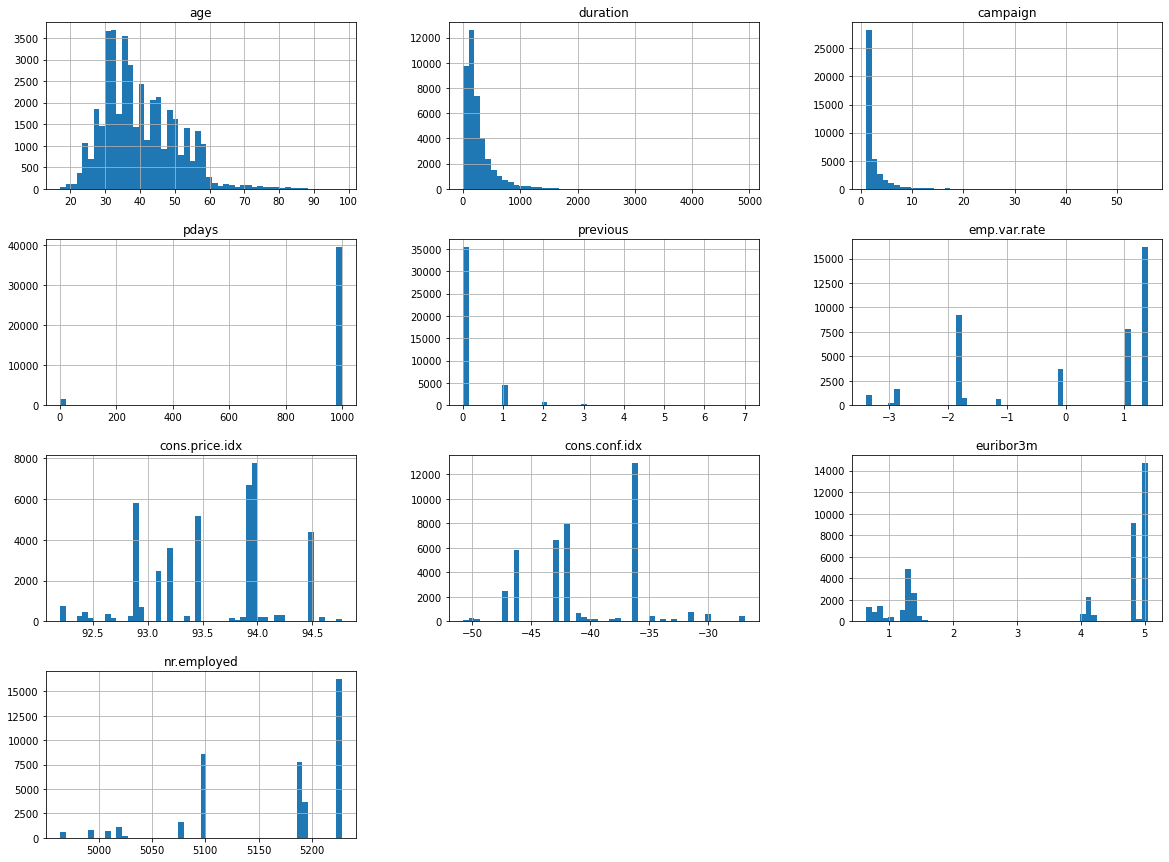

In [ ]:
bank_df.hist(bins=50, figsize=(20,15))
plt.show()

## Bar Graph

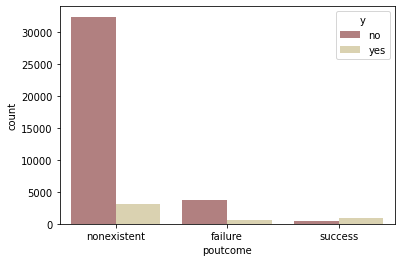

In [ ]:
# count positive and negative response of members for each category
sns.countplot(x="poutcome", hue="y",data=bank_df, palette="pink")

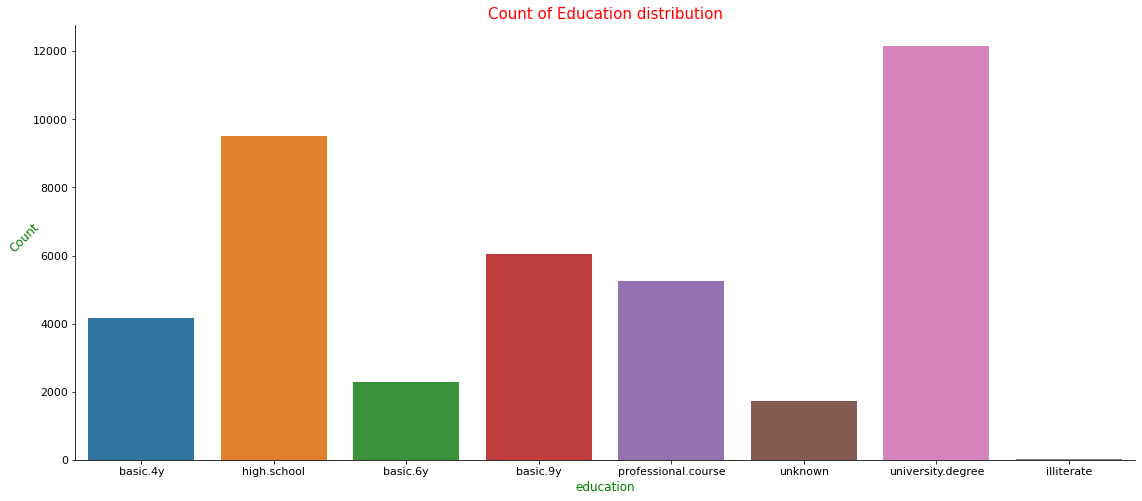

In [ ]:
# Count of Education distribution
figure, ax1 = plt.subplots()
figure.set_size_inches(19, 8)
sns.countplot(x = bank_df['education'])
ax1.set_xlabel('education', fontsize=12, color = 'g', rotation = 0)
ax1.set_ylabel('Count', fontsize=12, color = 'g', rotation = 45)
ax1.set_title('Count of Education distribution', fontsize=15, color ='red')
ax1.tick_params(labelsize=11)
sns.despine()

## Pie Chart

Note: shwing pie chart for only two selected columns.

Text(0.5, 1.0, 'Count Marital Status wise distribution')

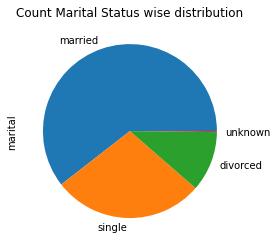

In [ ]:
# count for maritial status wise distribution - pie chart
a1 = bank_df['marital'].value_counts().plot(kind='pie')
a1.set_title("Count Marital Status wise distribution")

Text(0.5, 1.0, 'Count of Dependent(Result) Attribute distribution')

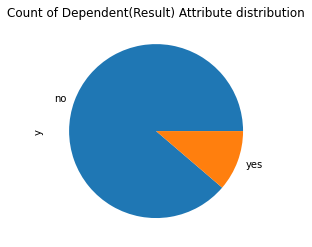

In [ ]:
a4 = bank_df['y'].value_counts().plot(kind='pie')
a4.set_title("Count of Dependent(Result) Attribute distribution")

#  Data Transformation

In [ ]:
# Label encoder order is alphabetical
labelencoder_X = LabelEncoder()
bank_df['job']      = labelencoder_X.fit_transform(bank_df['job']) 
bank_df['marital']  = labelencoder_X.fit_transform(bank_df['marital']) 
bank_df['education']= labelencoder_X.fit_transform(bank_df['education']) 
bank_df['default']  = labelencoder_X.fit_transform(bank_df['default']) 
bank_df['housing']  = labelencoder_X.fit_transform(bank_df['housing']) 
bank_df['loan']     = labelencoder_X.fit_transform(bank_df['loan']) 
bank_df['contact']     = labelencoder_X.fit_transform(bank_df['contact']) 
bank_df['month']       = labelencoder_X.fit_transform(bank_df['month']) 
bank_df['day_of_week'] = labelencoder_X.fit_transform(bank_df['day_of_week']) 
bank_df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)


In [ ]:
#converted age into group category
def age(df):
    df.loc[df['age'] <= 35, 'age'] = 1
    df.loc[(df['age'] > 35) & (df['age'] <= 45), 'age'] = 2
    df.loc[(df['age'] > 45) & (df['age'] <= 70), 'age'] = 3
    df.loc[(df['age'] > 70), 'age'] = 4
           
    return df

age(bank_df);

In [ ]:
# convert duration in some parts and label those 
def duration(df):

    df.loc[df['duration'] <= 100, 'duration'] = 1
    df.loc[(df['duration'] > 100) & (df['duration'] <= 175)  , 'duration']    = 2
    df.loc[(df['duration'] > 175) & (df['duration'] <= 325)  , 'duration']   = 3
    df.loc[(df['duration'] > 325) & (df['duration'] <= 640), 'duration'] = 4
    df.loc[df['duration']  > 640, 'duration'] = 5
    return df
duration(bank_df);

In [ ]:
bank_df
newfinal_df = bank_df.copy() # make a copy 
newfinal_df.head(5)

age  job  marital  education  default  housing  loan  contact  month  \
0    3    3        1          0        0        0     0        1      6   
1    3    7        1          3        1        0     0        1      6   
2    2    7        1          3        0        2     0        1      6   
3    2    0        1          1        0        0     0        1      6   
4    3    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

# Which attributes are used, which ones are eliminated? Why? (1 points)

In [ ]:
#selection of independendent variable. We are building the model that predict the category of people who are most likely to subscribe term deposit. For that we need the attributes before contact.
newfinal_df = newfinal_df.drop(["duration", "contact","month","day_of_week",'y'], axis=1)
newfinal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   campaign        41176 non-null  int64  
 8   pdays           41176 non-null  int64  
 9   previous        41176 non-null  int64  
 10  poutcome        41176 non-null  int64  
 11  emp.var.rate    41176 non-null  float64
 12  cons.price.idx  41176 non-null  float64
 13  cons.conf.idx   41176 non-null  float64
 14  euribor3m       41176 non-null  float64
 15  nr.employed     41176 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 6.3 MB



#Machine learning Models
#d) Solution description (12 points: 3 points per technic/model used in the solution)

In [ ]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank_df['y'], columns = ['y'], prefix = ['y'], drop_first = True)
y

['y']_yes
0              0
1              0
2              0
3              0
4              0
...          ...
41183          1
41184          0
41185          0
41186          1
41187          0

[41176 rows x 1 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(newfinal_df, y, test_size = 0.20, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()

age  job  marital  education  default  housing  loan  campaign  pdays  \
23147    3    9        1          3        0        0     0         2    999   
13990    2    9        0          6        0        0     2         2    999   
18828    2    0        1          6        0        0     0         1    999   
25971    3    2        1          6        0        2     0         2    999   
2943     3    0        1          6        1        0     0         2    999   

       previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  \
23147         0         1           1.4          93.444          -36.1   
13990         0         1           1.4          93.918          -42.7   
18828         0         1           1.4          93.444          -36.1   
25971         0         1          -0.1          93.200          -42.0   
2943          0         1           1.1          93.994          -36.4   

       euribor3m  nr.employed  
23147      4.965       5228.1  
13990      4.963       5228.1  
18828      4.970       5228.1  
25971      4.120       5195.8  
2943       4.859       5191.0

In [ ]:
# perform scaling for training data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#X_train

## Model 1 Gaussian NB

In [ ]:
#Model 1 Gaussian Naive Bayes 
GNB_model = GaussianNB().fit(X_train, y_train)
Predt_GNB = GNB_model.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, Predt_GNB))
print('Accuracy for Gaussian NB:',round(accuracy_score(y_test, Predt_GNB),2)*100)
GNB_CV = (cross_val_score(GNB_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix:
[[6384  874]
 [ 494  484]]
Accuracy for Gaussian NB: 83.0


## Model 2 Decision Tree

In [ ]:
#Model 2 Decison Tree
dt_model = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
pred_DT = dt_model.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_DT))
DTree_CV = (cross_val_score(dt_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print('Accuracy for Decision Tree:',round(accuracy_score(y_test, pred_DT),2)*100)

Confusion Matrix:
[[6644  614]
 [ 675  303]]
Accuracy for Decision Tree: 84.0


## Model 3 KNN


The highest accuracy is: 0.8975230694511899  and the optimum number of K is: 40


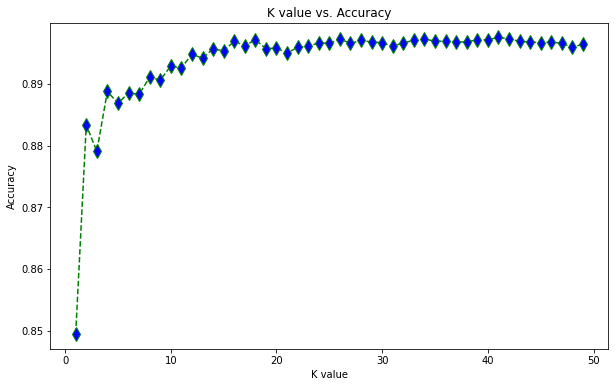

In [ ]:
#Model 3 KNN
X_train1, X_test1, y_train1, y_test1 = train_test_split(newfinal_df, y, test_size = 0.2, random_state = 101)

knn_acr = []
from sklearn import metrics
for i in range(1,50):
    KNN_nr = KNeighborsClassifier(n_neighbors = i).fit(X_train1,y_train1)
    KNN_predict = KNN_nr.predict(X_test1)
    knn_acr.append(metrics.accuracy_score(y_test1, KNN_predict))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),knn_acr,color = 'green',linestyle='--', 
         marker='d',markerfacecolor='blue', markersize=10)
plt.title('K value vs. Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
print("The highest accuracy is:",max(knn_acr)," and the optimum number of K is:",knn_acr.index(max(knn_acr)))

In [ ]:
#Model 3 KNN
k = 40  # from above selection
model_KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_KNN = model_KNN.predict(X_test)
print("For k = 40, Accuracy for KNN: ", round(metrics.accuracy_score(y_test, Pred_KNN),4)*100,"%")
print('Confusion Matrix:')
print(confusion_matrix(y_test, Pred_KNN))
KNNModel_CV = (cross_val_score(model_KNN, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

For k = 40, Accuracy for KNN:  89.72 %
Confusion Matrix:
[[7174   84]
 [ 763  215]]


## Model 4 Logistic Regression

In [ ]:
#Model 4 Logistic Regression
logistic_model = LogisticRegression().fit(X_train,y_train)
pred_logi = logistic_model.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred_logi))
print('Accuracy for Logistic Regression:',round(accuracy_score(y_test, pred_logi),2)*100)
LogiModel_CV = (cross_val_score(logistic_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

Confusion Matrix:
[[7187   71]
 [ 783  195]]
Accuracy for Logistic Regression: 90.0


## Model 5 MLP

In [ ]:
# PCA method for feature reduction
# we learned it in a class
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

In [ ]:
# define and train an MLPClassifier named mlp on the given data
ml = MLPClassifier(hidden_layer_sizes=(50,100,50), max_iter=250, activation='relu', solver='adam',learning_rate_init=0.001, random_state=1)
ml.fit(PCA_X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=250, random_state=1)

In [ ]:
print('Accuracy for the MLP:',ml.score(PCA_X_test, y_test))
# draw the confusion matrix
predict_ml = ml.predict(PCA_X_test)
confusion_matrix_ml = confusion_matrix(y_test, predict_ml)
print('Confusion matrix:')
print(confusion_matrix_ml)

Accuracy for the MLP: 0.8715395823215153
Confusion matrix:
[[6935  323]
 [ 735  243]]


In [ ]:
# print the training error and MSE
print('Training error: %f' % ml.loss_curve_[-1])
a_mlp = accuracy_score(y_test, predict_ml)
print('Accuracy:',accuracy_score(y_test, predict_ml))
print('MSE: %f' % mean_squared_error(y_test, predict_ml))

Training error: 0.159174
Accuracy: 0.8715395823215153
MSE: 0.128460


# Comparison of Model

## Accuracy wise comparison

In [ ]:
Class_model = pd.DataFrame({'Models Name': ['Decision Tree','K-Near Neighbors', 'Gausian Naive Bayes', 'Logistic Regression','MLP'],
                            'Accuracy':  [DTree_CV, KNNModel_CV, GNB_CV, LogiModel_CV, a_mlp]})
Class_model.sort_values(by='Accuracy', ascending=False)

Models Name  Accuracy
3  Logistic Regression  0.900364
1     K-Near Neighbors  0.899302
4                  MLP  0.871540
0        Decision Tree  0.847177
2  Gausian Naive Bayes  0.834760

Note: the logistic regression gives highest accuracy and gausian NB gives lowest accuracy result.

## ROC Curves 

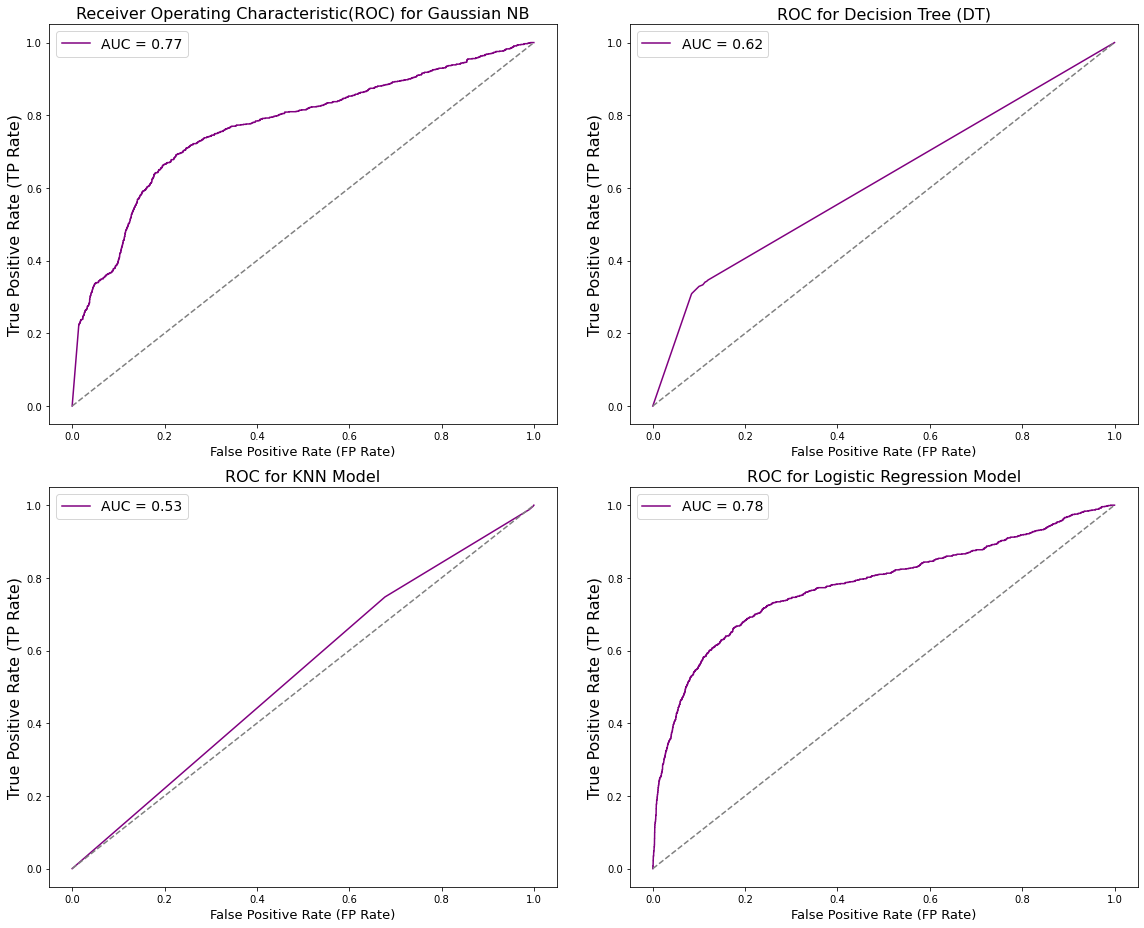

In [ ]:
fig, axis_a1 = plt.subplots(nrows = 2, ncols = 2, figsize = (16,13))

#--------------------GAUSSIAN Naive Bayes (GNB Model) ---------------------
model1 = GNB_model.predict_proba(X_test)
prdt_m1 = model1[:,1]
GAUS_fp, GAUS_tp, thresholdgau = metrics.roc_curve(y_test, prdt_m1)
GAUS_roc = metrics.auc(GAUS_fp, GAUS_tp)

axis_a1[0,0].plot(GAUS_fp, GAUS_tp, 'purple', label = 'AUC = %0.2f' % GAUS_roc)
axis_a1[0,0].plot([0, 1], [0, 1],'grey', linestyle='--')
axis_a1[0,0].set_ylabel('True Positive Rate (TP Rate)',fontsize=16)
axis_a1[0,0].set_xlabel('False Positive Rate (FP Rate)',fontsize=13)
axis_a1[0,0].set_title('Receiver Operating Characteristic(ROC) for Gaussian NB',fontsize=16)
axis_a1[0,0].legend(loc = 'Best', prop={'size': 14})
##########################################################################################################################
#--------------------Decision Tree Model --------------------
model2 = dt_model.predict_proba(X_test)
prdt_m2 = model2[:,1]
DT_fp, DT_tp, thresholdrfc = metrics.roc_curve(y_test, prdt_m2)
RF_roc = metrics.auc(DT_fp, DT_tp)

axis_a1[0,1].plot(DT_fp, DT_tp, 'purple', label = 'AUC = %0.2f' % RF_roc)
axis_a1[0,1].plot([0, 1], [0, 1],'grey', linestyle='--')
axis_a1[0,1].set_xlabel('False Positive Rate (FP Rate)',fontsize=13)
axis_a1[0,1].set_ylabel('True Positive Rate (TP Rate)',fontsize=16)
axis_a1[0,1].set_title('ROC for Decision Tree (DT)',fontsize=16)
axis_a1[0,1].legend(loc = 'Best', prop={'size': 14})
##########################################################################################################################
#--------------------K Nearest Neighbor (KNN) Model----------------------
model3 = KNN_nr.predict_proba(X_test)
prdt_m3 = model3[:,1]
KNNR_fp, KNNR_tp, thresholdknn = metrics.roc_curve(y_test, prdt_m3)
KNNR_roc = metrics.auc(KNNR_fp, KNNR_tp)

axis_a1[1,0].plot(KNNR_fp, KNNR_tp, 'purple', label = 'AUC = %0.2f' % KNNR_roc)
axis_a1[1,0].plot([0, 1], [0, 1],'grey', linestyle='--')
axis_a1[1,0].set_ylabel('True Positive Rate (TP Rate)',fontsize=16)
axis_a1[1,0].set_xlabel('False Positive Rate (FP Rate)',fontsize=13)
axis_a1[1,0].legend(loc = 'Best', prop={'size': 14})
axis_a1[1,0].set_title('ROC for KNN Model',fontsize=16)
###########################################################################################################################
#--------------------Logistic Regression Model--------------------
model4 = logistic_model.predict_proba(X_test)
prdt_m4 = model4[:,1]
LogiR_fp, LogiR_tp, thresholdlog = metrics.roc_curve(y_test, prdt_m4)
Log_roc = metrics.auc(LogiR_fp, LogiR_tp)

axis_a1[1,1].plot(LogiR_fp, LogiR_tp, 'purple', label = 'AUC = %0.2f' % Log_roc)
axis_a1[1,1].plot([0, 1], [0, 1],'grey', linestyle='--')
axis_a1[1,1].set_title('ROC for Logistic Regression Model',fontsize=16)
axis_a1[1,1].set_ylabel('True Positive Rate (TP Rate)',fontsize=16)
axis_a1[1,1].set_xlabel('False Positive Rate (FP Rate)',fontsize=13)
axis_a1[1,1].legend(loc = 'Best', prop={'size': 14})

plt.subplots_adjust(wspace=0.16)
plt.tight_layout() 

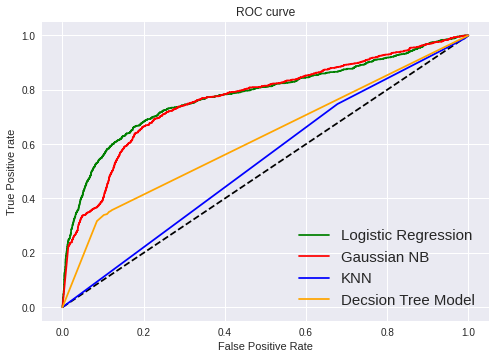

In [ ]:


# Comparing Roc Curves
plt.plot([0, 1], [0, 1], linestyle='--', color = 'black')
plt.plot(LogiR_fp, LogiR_tp, linestyle='-',color='green', label='Logistic Regression')
plt.plot(GAUS_fp, GAUS_tp, linestyle='-', color='red', label='Gaussian NB')
plt.plot(KNNR_fp, KNNR_tp, linestyle='-', color='blue', label='KNN')
plt.plot(DT_fp, DT_tp, linestyle='-',color='orange', label='Decsion Tree Model')

#For title of the Plot
plt.title('ROC curve')
#For x and y labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'lower right', prop={'size': 15})
plt.show();

## Classification Reports (Precision, Recall and F1-score)

In [ ]:
print('\nClassification Report for KNN (k Nearest Neighbor)\n\n',classification_report(y_test, Pred_KNN))


Classification Report for KNN (k Nearest Neighbor)

               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7258
           1       0.72      0.22      0.34       978

    accuracy                           0.90      8236
   macro avg       0.81      0.60      0.64      8236
weighted avg       0.88      0.90      0.87      8236



In [ ]:
print('\nClassification Report for Decision Tree model\n\n',classification_report(y_test, pred_DT))


Classification Report for Decision Tree model

               precision    recall  f1-score   support

           0       0.91      0.92      0.91      7258
           1       0.33      0.31      0.32       978

    accuracy                           0.84      8236
   macro avg       0.62      0.61      0.62      8236
weighted avg       0.84      0.84      0.84      8236



In [ ]:
print('\nClassification Report for Gaussian Naive Bayes Model\n\n',classification_report(y_test, Predt_GNB))


Classification Report for Gaussian Naive Bayes Model

               precision    recall  f1-score   support

           0       0.93      0.88      0.90      7258
           1       0.36      0.49      0.41       978

    accuracy                           0.83      8236
   macro avg       0.64      0.69      0.66      8236
weighted avg       0.86      0.83      0.85      8236



In [ ]:
print('\nClassification Report for Logistic Regression Model\n\n',classification_report(y_test, pred_logi))


Classification Report for Logistic Regression Model

               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7258
           1       0.73      0.20      0.31       978

    accuracy                           0.90      8236
   macro avg       0.82      0.59      0.63      8236
weighted avg       0.88      0.90      0.87      8236

